In [1]:
import numpy as np
import glob
import wrf
from netCDF4 import Dataset, MFDataset
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from wrf import getvar, ALL_TIMES

from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)

In [10]:
f2(pd.read_csv('ecc1_.csv').vi_med)

ValueError: could not convert string to float: '-'

In [34]:
x=pd.read_csv('ecc1_.csv').vs_med

In [35]:
for i, j in enumerate(x):
    try:
        float(i)
    except:
        x[i] = np.nan

In [36]:
for i in range(len(x)):
    try:
        float(x[i])
    except:
        x[i] = np.nan

In [37]:
from metpy.calc import smooth_gaussian

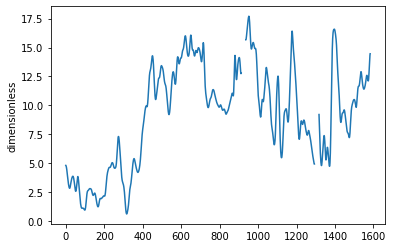

In [38]:
x= x.astype('float')
plt.plot(smooth_gaussian(x, 25))

In [2]:
def f(x): 
    return np.float(x)
f2 = np.vectorize(f) 

In [3]:
file_geo = '/home/lucas/dados_vento/dominios/test/geo_em.d02.nc'
geogrid = Dataset(file_geo)
topografia = wrf.getvar(geogrid,"HGT_M")

In [5]:
files_pred = sorted(glob.glob('/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/wrfout_d02*'))
wrfile = MFDataset(files_pred)
wrflist = [Dataset(i) for i in files_pred]
velocidade_modelo = getvar(wrflist, "wspd_wdir", timeidx=ALL_TIMES, method="cat")
lon_modelo = getvar(wrflist[0], 'lon')
lat_modelo = getvar(wrflist[0], 'lat')
z = getvar(wrflist, "z", timeidx=ALL_TIMES, method='cat')

files_ecc = sorted(glob.glob('/home/lucas/dados_vento/ecc*'))
ecc1 = pd.read_csv(files_ecc[0])
ecc2 = pd.read_csv(files_ecc[1])
ecc3 = pd.read_csv(files_ecc[2])
velocidade_ecc1 = f2(ecc1[(ecc1.data>='2018-05-23 00:00:00')&(ecc1.data<='2018-05-23 14:40:00')].vs_med.values)
velocidade_ecc2 = f2(ecc2[(ecc2.data>='2018-05-23 00:00:00')&(ecc2.data<='2018-05-23 14:40:00')].vs_med.values)
velocidade_ecc3 = f2(ecc3[(ecc3.data>='2018-05-23 00:00:00')&(ecc3.data<='2018-05-23 14:40:00')].vs_med.values)


torres = pd.read_csv('/home/lucas/dados_vento/lat_lon_towers.txt', usecols=[1,2]).values
torre_1 = [torres[0,0],torres[0,1]]
torre_2 = [torres[1,0],torres[1,1]]
torre_3 = [torres[2,0],torres[2,1]]

file_geo = '/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/geo_em.d02.nc'
geogrid = Dataset(file_geo)
topografia = wrf.getvar(geogrid,"HGT_M")

In [6]:
import wrf

In [7]:
velocidade_modelo.shape

(2, 2, 29, 87, 87)

In [17]:
vel[0][0]

array([[4.00703478, 3.95740986, 3.913656  , ..., 3.28728819, 3.3306067 ,
        3.36037898],
       [4.00747538, 3.97282577, 3.92813563, ..., 3.31720352, 3.35140157,
        3.37002945],
       [3.98801589, 3.97711492, 3.94742322, ..., 3.33672833, 3.35162282,
        3.3599813 ],
       ...,
       [4.25743103, 4.28750944, 4.29243803, ..., 3.94729996, 3.87608004,
        3.84613848],
       [4.21444321, 4.23445177, 4.24922943, ..., 3.79757142, 3.76755738,
        3.76511574],
       [4.17482328, 4.1986599 , 4.23755789, ..., 3.71351743, 3.71867013,
        3.76795435]])

In [9]:
z_normalize.shape

NameError: name 'z_normalize' is not defined

In [10]:
a.shape

NameError: name 'a' is not defined

In [11]:
files_pred

['/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/wrfout_d02_2018-05-22_18:00:00',
 '/media/lucas/ce7c746b-5271-4ebe-a443-a00fe8fb43f4/wrf/WRF/run/wrfout_d02_2018-05-22_18:10:00']

In [12]:
vel = f2(velocidade_modelo[0,:,:].values)

In [18]:
z_normalize = f2(z[:,:,:].values)

In [19]:
a = wrf.interplevel(vel, z_normalize, [316.017822265625+108])

In [20]:
vel_pred = f2(a[:,35,46])

In [21]:
f2(a[:,35,46]).shape

(2,)

In [22]:
velocidade_ecc1.shape

(89,)

In [23]:
a[:,35,46].values.shape

(2,)

In [ ]:
coordenada

In [24]:
n=0
coordenada=[]
while n<3:
    abslat = np.abs(lat_modelo-torres[n,0])
    abslon = np.abs(lon_modelo-torres[n,1])
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    idx = x,y
    coordenada.append(idx)
    n+=1

In [25]:
formatter = DateFormatter('%H:%M')
date1 = dt.datetime(2018, 5, 23, 0, 0)
date2 = dt.datetime(2018, 5, 23, 9, 9)
delta = dt.timedelta(minutes=10)

In [26]:
dates = pd.date_range(date1,date2,periods=len(vel_pred))

In [29]:
velocidade_ecc1[:2]

array([4.5 , 5.12])

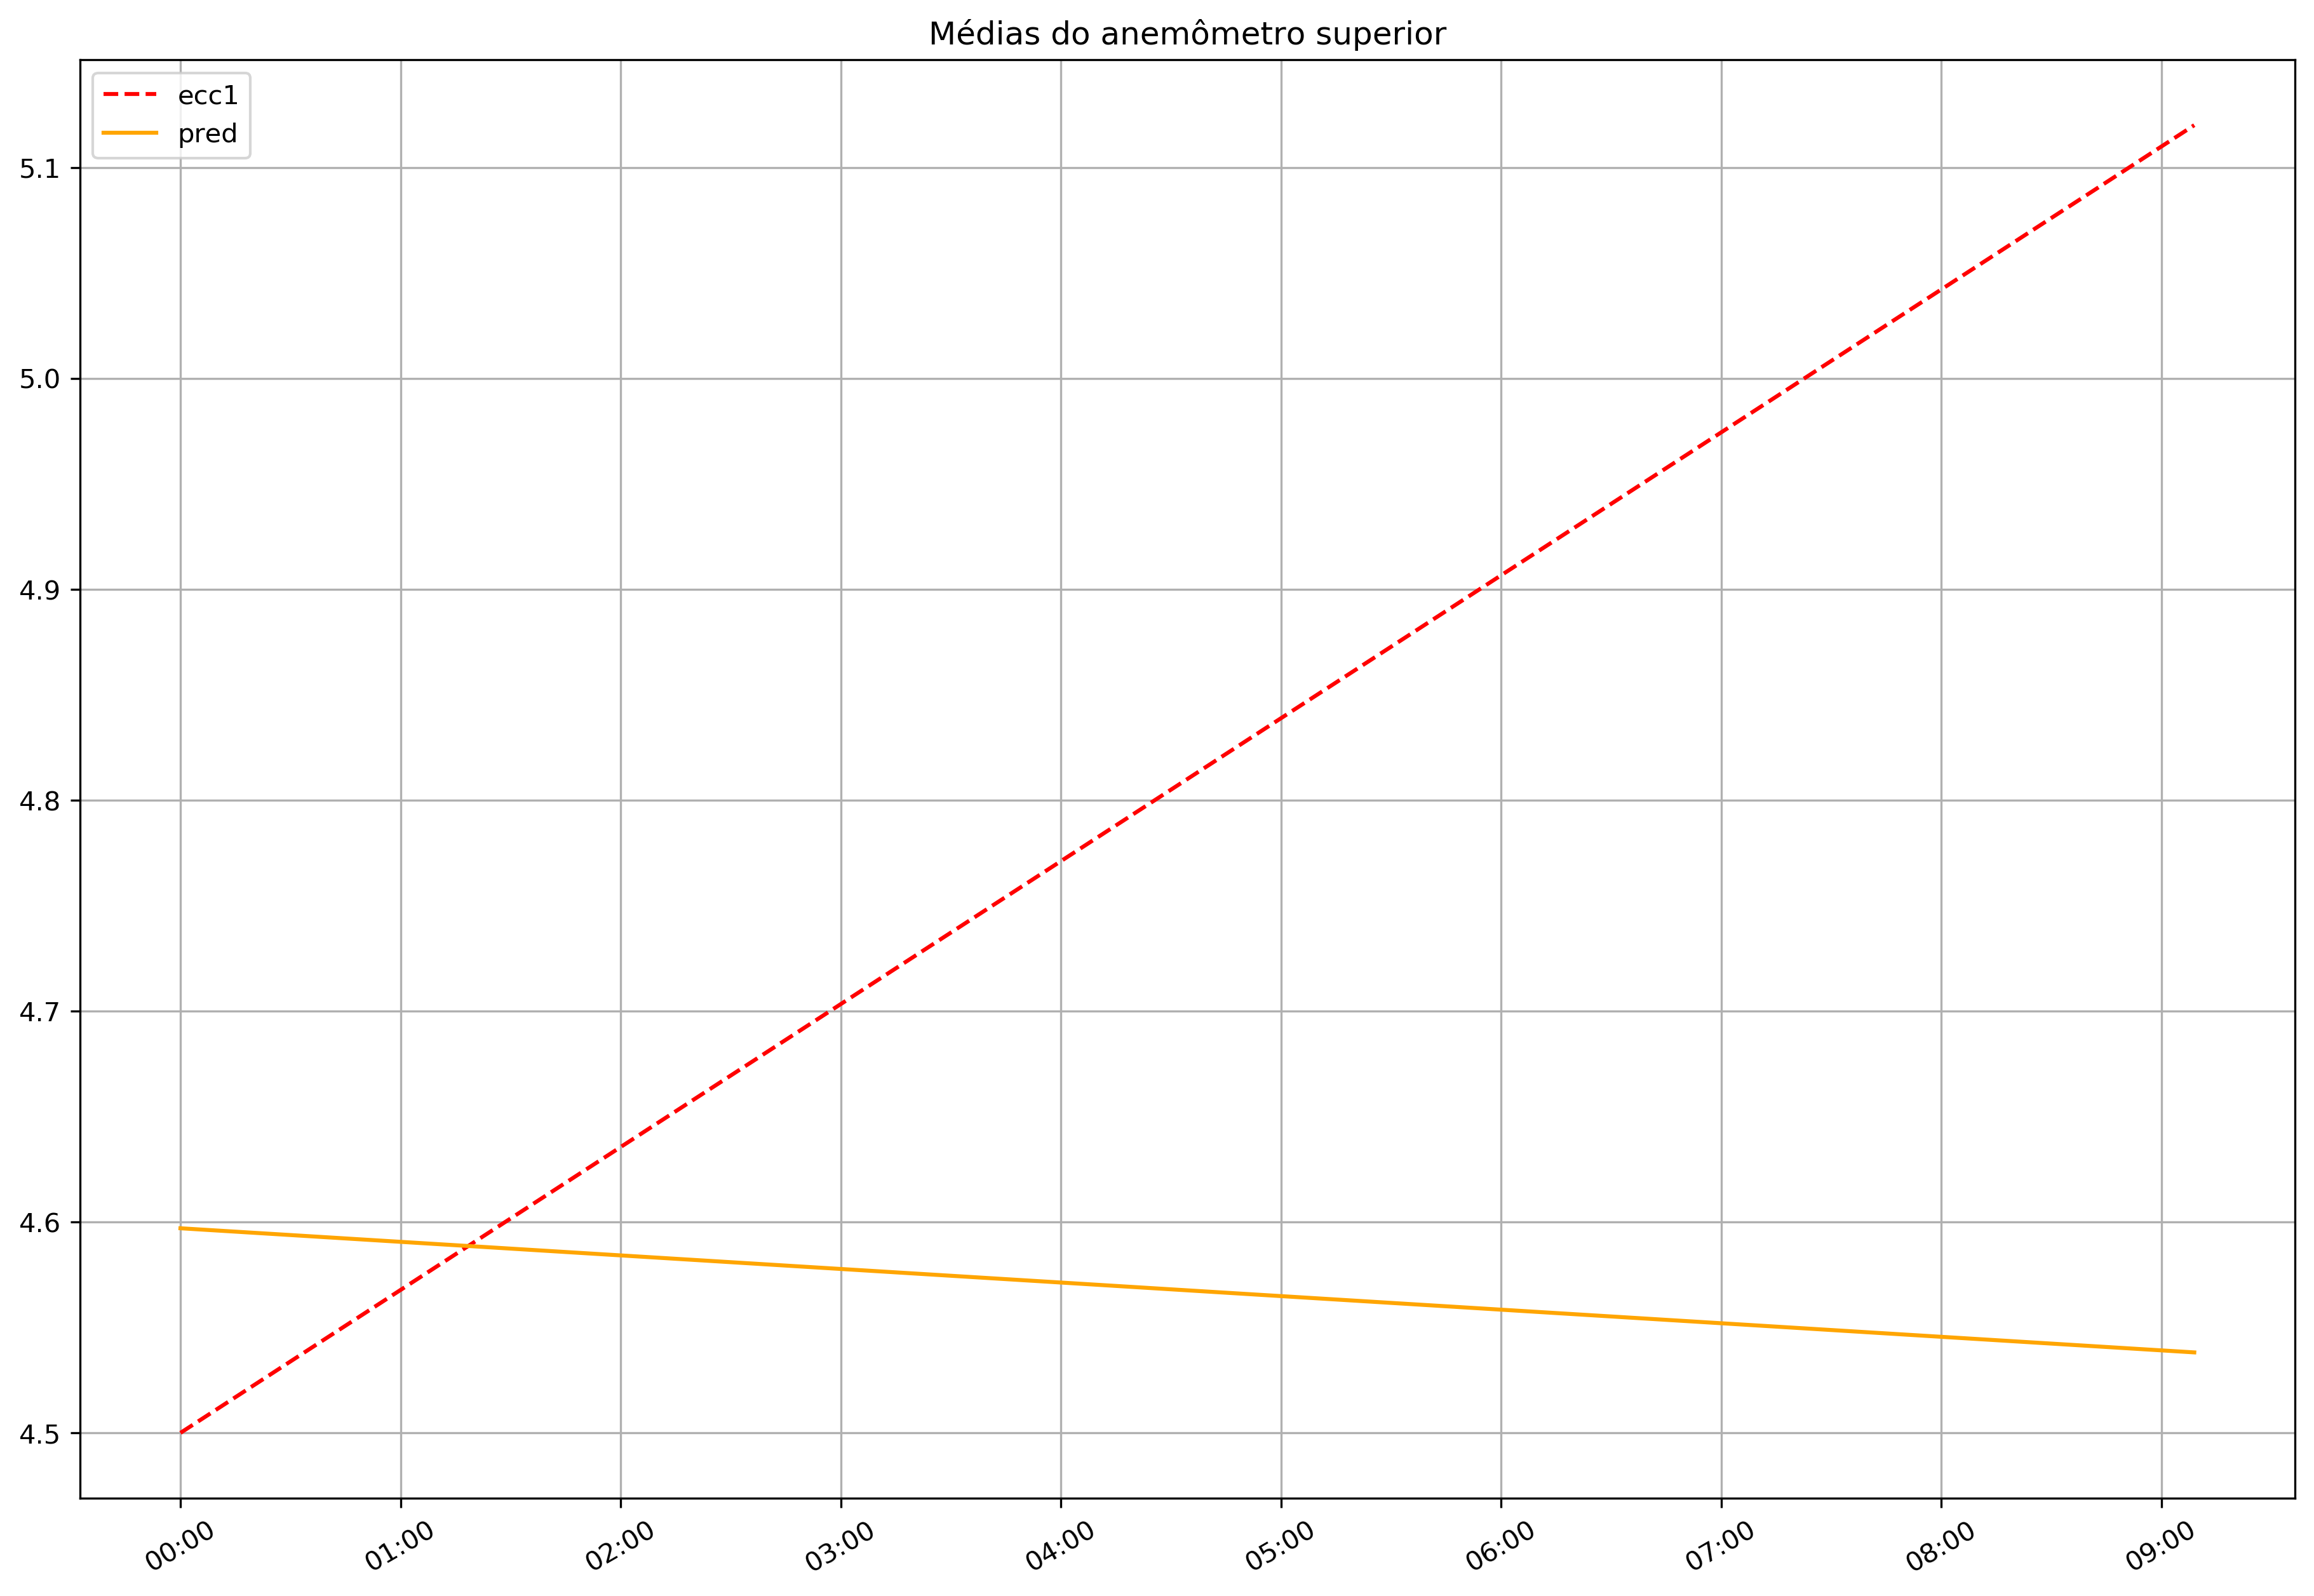

In [40]:
#mean = (velocidade_ecc1+velocidade_ecc2+velocidade_ecc3)/3
fig, ax = plt.subplots(figsize=[15,10], dpi=300)
plt.title('Médias do anemômetro superior')
ax.grid(b=True)
formatter = DateFormatter('%H:%M')
ax.plot(dates,velocidade_ecc1[:2], '--r')
#ax.plot(dates,velocidade_ecc2, '--g')
#ax.plot(dates,velocidade_ecc3, '--b')
#ax.plot(dates,mean,'black')
#ax.plot(dates,mean,'or')
ax.plot(dates,vel_pred,'orange')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(('ecc1','pred'))
plt.savefig('/home/lucas/dados_vento/figuras/ens_4.png')
plt.show()

In [111]:
np.corrcoef(vel_pred,velocidade_ecc1)

array([[1.        , 0.68123006],
       [0.68123006, 1.        ]])

In [113]:
mean_squared_error(vel_pred, velocidade_ecc1)

5.487564553778411

In [112]:
mean_absolute_error(vel_pred, velocidade_ecc1)

2.1370878596333927

In [ ]:
float(coordenadas[1][0])

In [ ]:
float(coordenadas[1][1])

In [ ]:
float(coordenadas[2][0])

In [ ]:
float(coordenadas[2][1])

In [ ]:
n=0
coordenada=[]
wind=[]
topografia=[]
while n<3:
    abslat = np.abs(lat-torres[n,0])
    abslon = np.abs(lon-torres[n,1])
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    wind_ = a[1,x,y]
    topografia_ = geo[x,y]
    wind.append(wind_)
    topografia.append(topografia_)
    n+=1